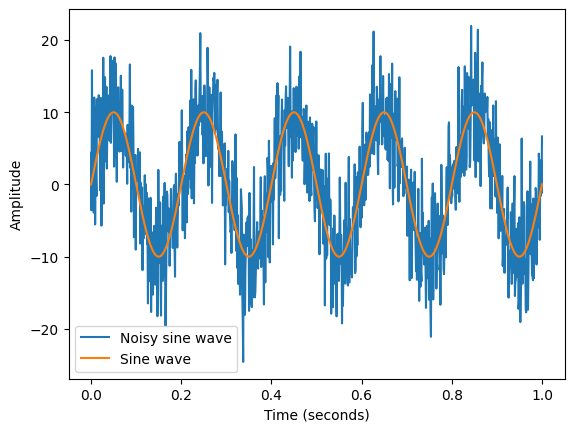

In [1]:
import numpy as np
import matplotlib.pyplot as plt

amplitude = 10
frequency = 5
time_length = 1 
sample_rate = 1000 

time = np.linspace(0, time_length, sample_rate * time_length)

sine_wave = amplitude * np.sin(2 * np.pi * frequency * time)
noise = np.random.normal(scale=5, size=time.size)  # Gaussian noise with std=5

noisy_sine_wave = sine_wave + noise

plt.plot(time, noisy_sine_wave,     label='Noisy sine wave')
plt.plot(time, sine_wave, label='Sine wave')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

--- 0.013920068740844727 seconds ---


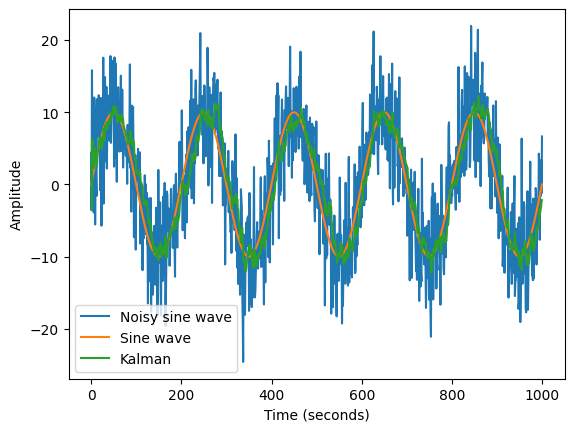

In [2]:
from filterpy.kalman import KalmanFilter
import numpy as np
import time



f = KalmanFilter(dim_x=1, dim_z=1)

f.x = np.array([[noisy_sine_wave[0]]])

f.F = np.array([[1.]])

f.H = np.array([[1.]])

f.P *= 1000.
f.R = 5
f.Q = 0.1

predicted = []
start_time = time.time()
for i in range(999):
    z = np.array([[noisy_sine_wave[i + 1]]])
    f.predict()
    predicted.append(f.x[0][0])
    f.update(z)

print("--- %s seconds ---" % (time.time() - start_time))

plt.plot(np.arange(1000), noisy_sine_wave, label='Noisy sine wave')
plt.plot(np.arange(1000), sine_wave, label='Sine wave')
plt.plot(np.arange(1, 1000), predicted, label='Kalman')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [19]:
new_a = np.array([noisy_sine_wave, -noisy_sine_wave]).reshape(2, -1)

In [20]:
np.cov(new_a)

array([[ 75.52093007, -75.52093007],
       [-75.52093007,  75.52093007]])